# **Import Library yang digunakan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# **Data Understanding**

In [2]:
obat = pd.read_csv('obat.csv', on_bad_lines='skip')


membaca 10 kolom pertama dalam data

In [3]:
obat.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,192361,Drospirenone / ethinyl estradiol,Birth Control,"""No side effects(nausea, headaches,etc) \r\r\n...",9,5-May-15,3
1,202481,Lithium,Bipolar Disorde,"""When I originally got sick with insomnia and ...",8,7-Jul-14,33
2,42681,Concerta,ADHD,"""As an adult with ADHD Concerta is the way to ...",8,9-Aug-09,40
3,138297,Orthovisc,Osteoarthritis,"""What a waste of money I paid a copay of $400 ...",1,20-Jun-15,21
4,76754,Lorcaserin,Weight Loss,"""Took first pill yesterday. Noticed almost imm...",1,22-Jun-16,19
5,156326,Ropinirole,Restless Legs Syndrome,"""Ropinerol works for my jumpy legs, but I had ...",8,13-Jun-15,25
6,22846,Mestinon,Dysautonomia,"""I&#039;ve been on 30mg of Mestinon two times ...",8,29-Jun-14,9
7,212257,Lamotrigine,Seizure Prevention,"""I love this medicine. Made it that I didn&#03...",10,27-Mar-12,12
8,159061,TriNessa,Birth Control,"""I have I have been taking tri ness for only a...",7,18-Jan-16,2
9,192411,Drospirenone / ethinyl estradiol,Acne,"""I am now on my 5th month of Yaz and I have ze...",10,26-Nov-14,21


menampilkan informasi data obat, merujuk pada jumlah data dan type data yang diguakan

In [4]:
obat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     15000 non-null  int64 
 1   drugName     15000 non-null  object
 2   condition    14919 non-null  object
 3   review       15000 non-null  object
 4   rating       15000 non-null  int64 
 5   date         15000 non-null  object
 6   usefulCount  15000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 820.4+ KB


---
**obat.describe** digunakan untuk menampilkan statistik deskriptif dari sebuah dataset berupa distribusi data numerik, termasuk ukuran pemusatan, dispersi, dan bentuk distribusi

In [5]:
obat.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,uniqueID,rating,usefulCount
count,15000.00,15000.00,15000.00
mean,116168.49,6.96,28.38
std,66692.51,3.29,37.51
min,0.00,1.00,0.00
25%,58363.00,4.00,6.00
50%,116385.50,8.00,16.00
75%,174071.50,10.00,36.00
max,232284.00,10.00,949.00


Dataset obat memiliki rating terendah 1 dan rating tertinggi 10 dengan rata-rata 6.96. Dataset ini juga memiliki jumlah kegunaan terendah 0 dan terbanyak 949 dengan rata-rata 28.38.


---



obat.shape digunakan untuk menampilan hasil berupa banyaknya jumlah baris data dan kolom yang ada dalam dataset obat.csv

In [6]:
obat.shape

(15000, 7)

In [7]:
print('Jumlah UniqueID Obat: ', len(obat.uniqueID.unique()))
print('Jumlah Nama obat: ', len(obat.drugName.unique()))
print('Jumlah Kondisi: ', len(obat.condition.unique()))
print('Jumlah Review Obat: ', len(obat.review.unique()))
print('Jumlah Rating Obat: ', len(obat.rating.unique()))
print('Jumlah Kegunaan obat: ', len(obat.usefulCount.unique()))

Jumlah UniqueID Obat:  15000
Jumlah Nama obat:  1756
Jumlah Kondisi:  507
Jumlah Review Obat:  14579
Jumlah Rating Obat:  10
Jumlah Kegunaan obat:  267


In [8]:
print('Jenis Obat: ', (obat.drugName.unique()))

Jenis Obat:  ['Drospirenone / ethinyl estradiol' 'Lithium' 'Concerta' ... 'SMZ-TMP DS'
 'Rhofade' 'Sporanox']


In [9]:
print('kondisi: ', (obat.condition.unique()))

kondisi:  ['Birth Control' 'Bipolar Disorde' 'ADHD' 'Osteoarthritis' 'Weight Loss'
 'Restless Legs Syndrome' 'Dysautonomia' 'Seizure Prevention' 'Acne'
 'Pain' 'Non-Small Cell Lung Cance' 'Asthma' 'Neuralgia' 'Insomnia'
 'Muscle Spasm' 'Bacterial Vaginitis' 'Alcohol Dependence'
 'Menstrual Disorders' 'Panic Disorde' 'Major Depressive Disorde'
 'Bronchitis' 'Urinary Tract Infection' 'Anxiety' 'Arrhythmia'
 'Deep Vein Thrombosis, First Event' 'Abnormal Uterine Bleeding'
 'High Blood Pressure' 'Obesity' 'Overactive Bladde' 'Anxiety and Stress'
 'Diabetes, Type 2' 'Erosive Esophagitis' 'Burning Mouth Syndrome' 'Cough'
 'Chlamydia Infection' 'Migraine Prevention'
 'Obsessive Compulsive Disorde' 'Schizoaffective Disorde' 'Rosacea'
 'Nausea/Vomiting' 'Helicobacter Pylori Infection' 'Cerebral Edema'
 'Atrophic Urethritis' 'Opiate Withdrawal' 'Hepatitis C' 'Anemia'
 'Constipation' 'Bacterial Infection' 'Depression' 'Not Listed / Othe'
 'Osteoporosis' 'Peripheral Neuropathy' 'Trichomoniasis' 'Br

In [10]:
print('Rating: ', (obat.rating.unique()))

Rating:  [ 9  8  1 10  7  6  4  5  3  2]


In [11]:
print('Obat UsefulCount:',(obat.usefulCount.unique()))

Obat UsefulCount: [  3  33  40  21  19  25   9  12   2  14  28  17  26   1   7  22   6  67
  42  44  49 104  46  94   5  31  15  48 101  35  20 115  11  83  61  30
   8 132  29  10  16   0   4  73  27  34  24 152  57 150  45  32  23  52
  56  38 111  51  70  13  55  36  37 147  53  69  54 134 182  66 109  74
 125 117  96  75  18  72  64  85 124  59 168  50  84  77  63 160 110  80
  68 113  81  71 179 108 126  47 176  95  39 135  88 344 195 234  60 313
 131  43  58  41 159 114  86 129 172 153 121 137 103 198 157 123  82 141
 138  99  97 486 107 255 146 140 149  65 328  92  62 127 211 106 151 118
 368 100  87 220 102 154  76 116 130 120 282 148  89 143 304  79 112  93
 315  90 197 105 217 161 183  91 133  78 414 235 167 170 144 253 136 201
 188 145 194 165  98 214 122 185 163 229 202 200 209 203 256 119 156 155
 559 128 191 261 187 249 190 233 162 448 164 228 181 158 286 283 139 175
 180 193 204 174 949 142 371 166 239 470 213 308 199 289 240 207 484 291
 262 206 184 310 358 226 264 186 

### Menampilakan Visualisasi dari Distribusi rata-rata berdasarkan Rating Obat

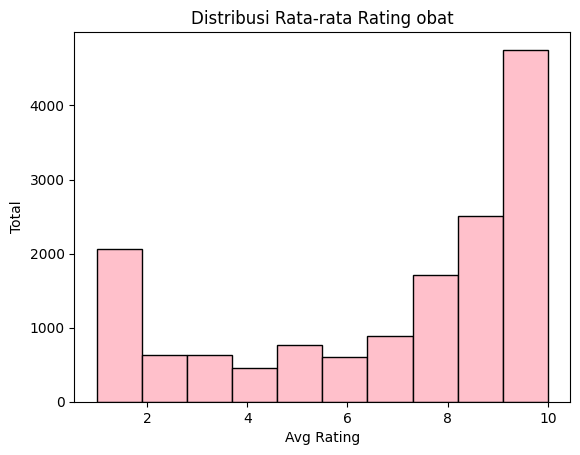

In [12]:
# Drugs Average Ratings Distribution
plt.hist(obat.rating, color='pink', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Distribusi Rata-rata Rating obat")
plt.show()

berdasarkan pada grafik diatas sebagian besar pengguna obat memberikan rating tertinggi (10) dengan jumlah rating 4726. hal tersebut menunjukan kepuasan pengguna terhadap obat yang mereka gunakan

---



obat['condition'].sort_values(ascending=False) digunakan Mengurutkan DataFrame berdasarkan kolom condition dalam urutan menurun (descending) — artinya dari Z ke A (atau kondisi paling akhir secara alfabet ke awal).



In [13]:
obat['condition'].sort_values(ascending=False).head()

,condition
10100,zen Shoulde
1831,zen Shoulde
10358,zen Shoulde
3731,von Willebrand's Disease
4631,moterol)


Membuat Visualisasi untuk jenis obat yang paling sering digunakan dalam berbagai kondisi kesehatan. Kode ini bertujuan untuk menampilkan 10 obat teratas yang paling banyak digunakan untuk berbagai kondisi kesehatan berdasarkan banyaknya kemunculan (jumlah penggunaan) obat tersebut dalam dataset.

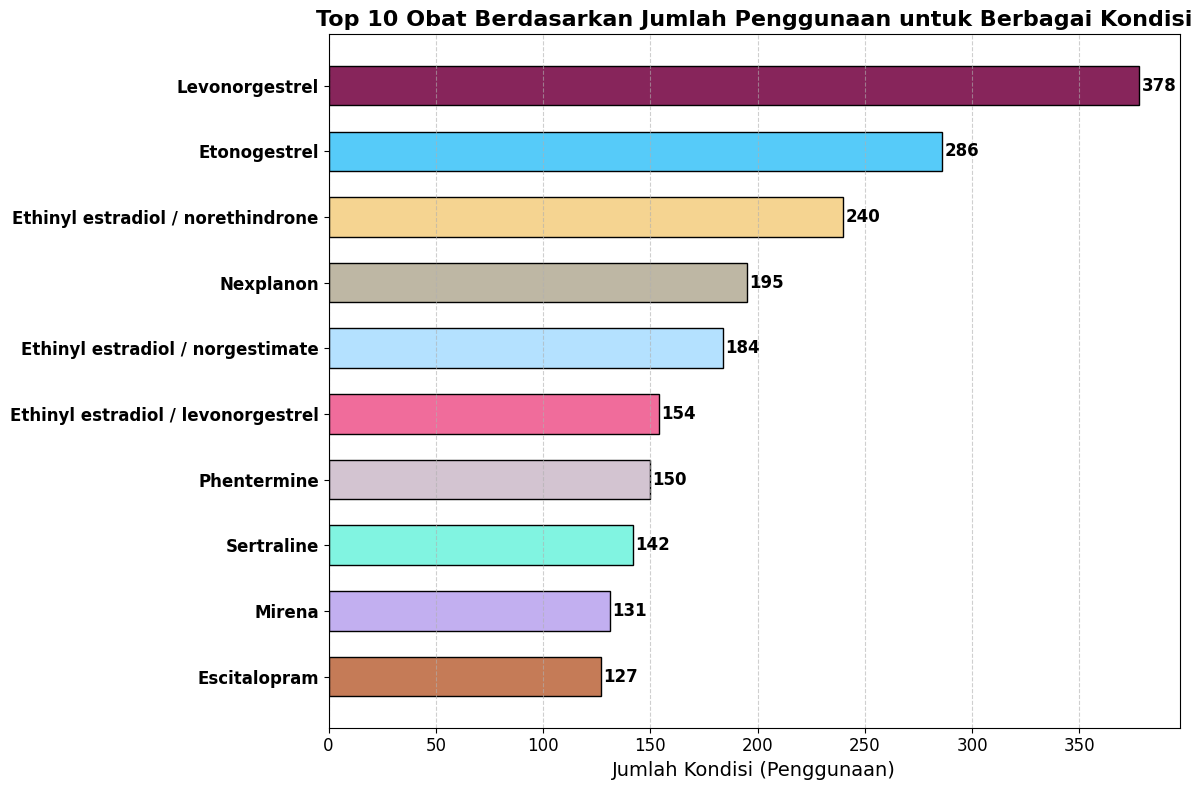

In [14]:
# Hitung jumlah obat berdasarkan condition
top10_obat = (
    obat.groupby('drugName')['condition']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(12, 8))
colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']
labels = top10_obat['drugName'].values
values = top10_obat['count'].values

bars = plt.barh(labels, values, color=colors, edgecolor='black', height=0.6)

# Tambahkan label jumlah
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{int(width)}", va='center', fontsize=12, fontweight='bold')

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Top 10 Obat Berdasarkan Jumlah Penggunaan untuk Berbagai Kondisi", fontsize=16, fontweight='bold')
plt.xlabel("Jumlah Kondisi (Penggunaan)", fontsize=14)
plt.tight_layout()
plt.show()




---


obat['rating'].sort_values(ascending=False) digunakan Mengurutkan DataFrame berdasarkan kolom rating dalam urutan menurun (descending).


In [15]:
# mengurutkan data rating dari tertinggi ke terendah
obat['rating'].sort_values(ascending=False).head()

,rating
14995,10
14994,10
14976,10
14973,10
14971,10


Membuat Visualisasi untuk jenis obat yang paling sering digunakan dengan berdasarkan pada rating yang diberikan. Kode ini bertujuan untuk menampilkan 10 obat teratas yang paling banyak digunakan untuk berbagai kondisi kesehatan berdasarkan banyaknya kemunculan (jumlah penggunaan) obat tersebut dalam dataset.

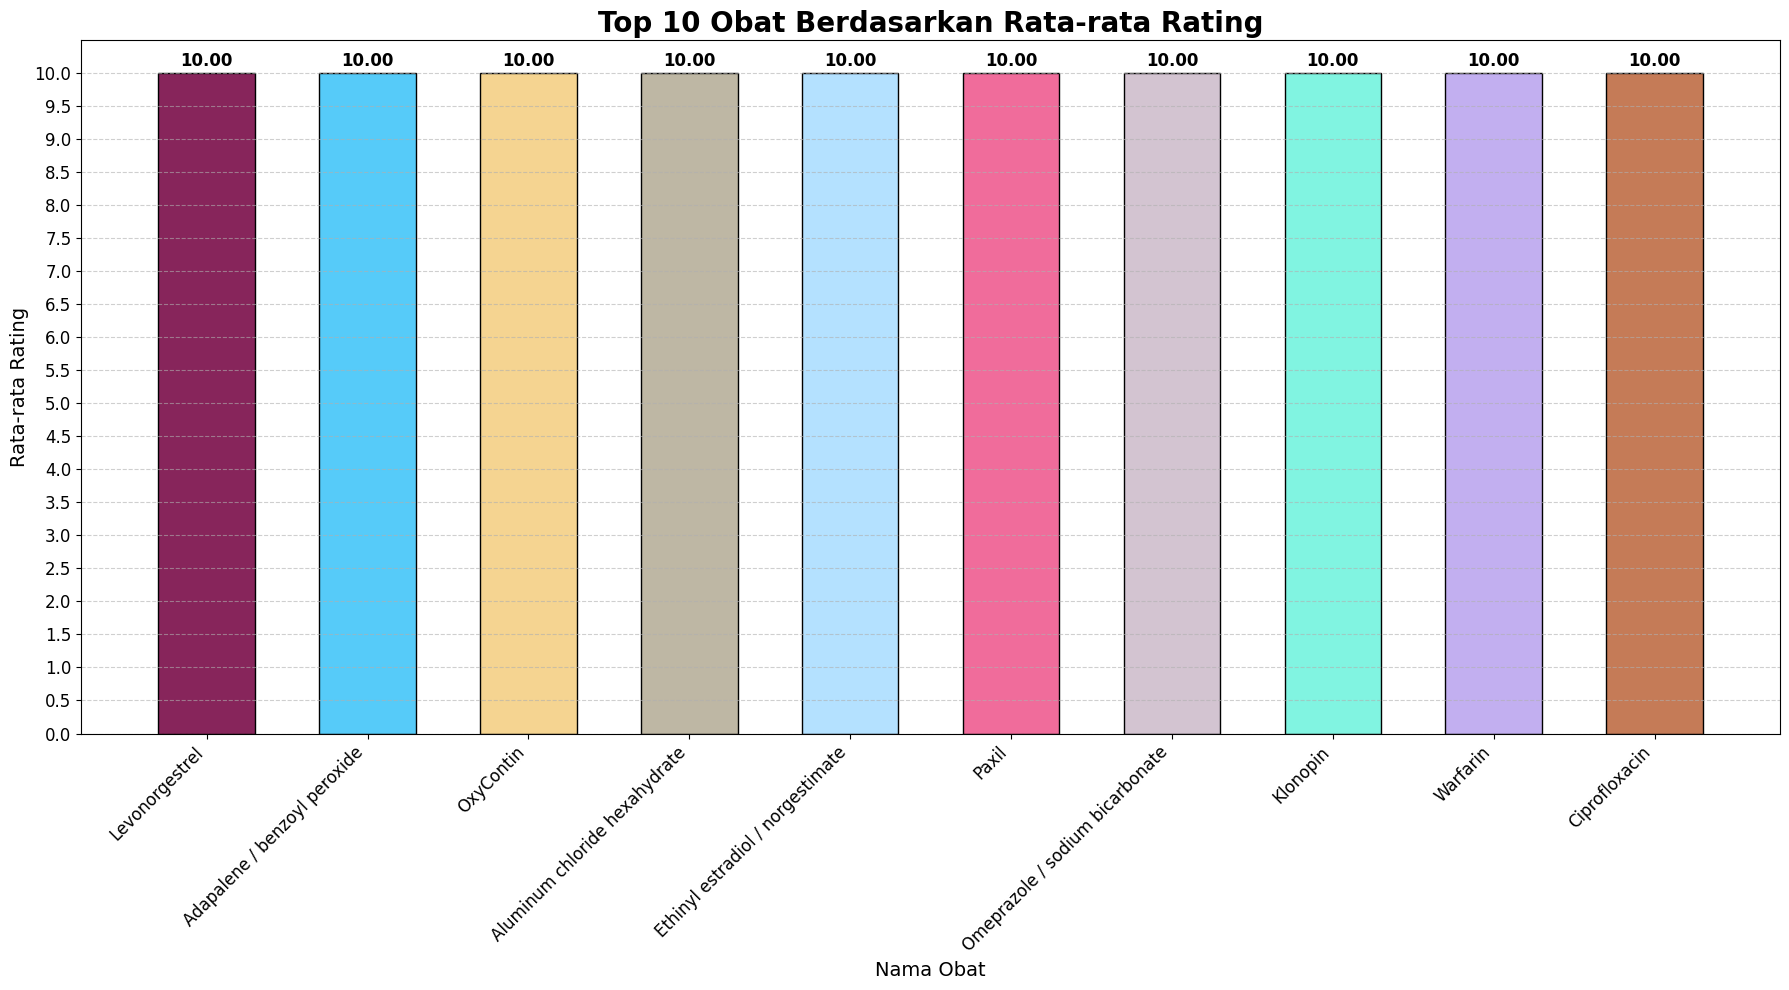

In [16]:
# Ambil 10 obat dengan rating tertinggi
top10_obat = obat[['drugName', 'rating']].sort_values(by='rating', ascending=False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF',
          '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

labels = top10_obat['drugName'].values
values = top10_obat['rating'].values

plt.figure(figsize=(18, 10))
bars = plt.bar(labels, values, color=colors, edgecolor='black', width=0.6)

# Tambahkan nilai rating di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05,
             f"{height:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Tata letak & tampilan
plt.ylabel("Rata-rata Rating", fontsize=14)
plt.xlabel("Nama Obat", fontsize=14)
plt.title("Top 10 Obat Berdasarkan Rata-rata Rating", fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(0, 10.5, 0.5), fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

obat['usefulCount'].sort_values(ascending=False) digunakan Mengurutkan DataFrame berdasarkan kolom condition dalam urutan menurun (descending) — artinya dari Z ke A (atau kondisi paling akhir secara alfabet ke awal) atau dari yang terbesar ke terkecil.



In [17]:
#mengurutkan data usefulCount dari terbesar ke kecil
obat['usefulCount'].sort_values(ascending=False).head()

,usefulCount
6745,949
9428,695
4751,559
895,486
8204,484


Membuat Visualisasi untuk jenis obat yang paling sering digunakan berdasarkan pada kegunaan. Kode ini bertujuan untuk menampilkan 10 obat teratas yang paling banyak digunakan untuk berbagai umlah kegunaan berdasarkan banyaknya kemunculan (jumlah penggunaan) obat tersebut dalam dataset.

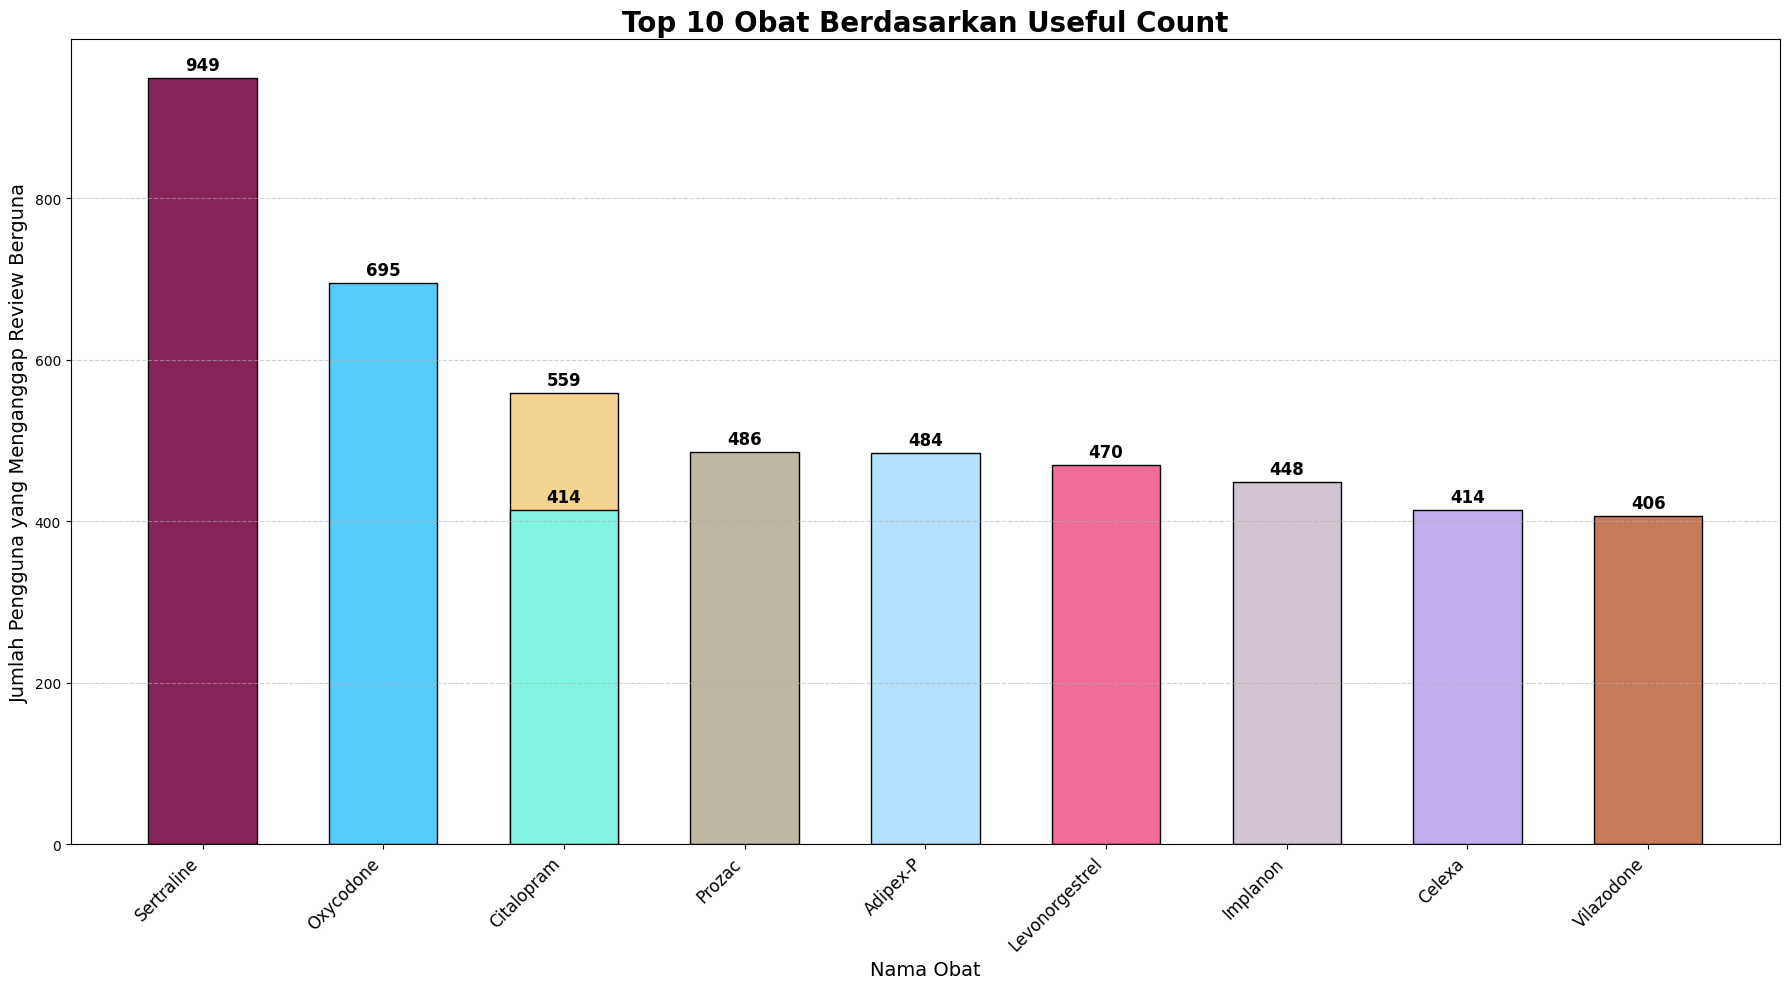

In [18]:
# Ambil 10 obat dengan usefulCount tertinggi
top10_obat = obat[['drugName', 'usefulCount']].sort_values(by='usefulCount', ascending=False).head(10)

# Data untuk plotting
colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF',
          '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

labels = top10_obat['drugName'].values
values = top10_obat['usefulCount'].values

# Plot
plt.figure(figsize=(18, 10))
bars = plt.bar(labels, values, color=colors, edgecolor='black', width=0.6)

# Tambahkan nilai di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f"{int(height):,}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Tata letak & tampilan
plt.ylabel("Jumlah Pengguna yang Menganggap Review Berguna", fontsize=14)
plt.xlabel("Nama Obat", fontsize=14)
plt.title("Top 10 Obat Berdasarkan Useful Count", fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Data Preparation**

**obat.isnull().sum** merupakan langkah untuk melihat apakah dalam data tersebut memiliki nilai kosong atau Null

In [19]:
obat.isnull().sum()

,0
uniqueID,0
drugName,0
condition,81
review,0
rating,0
date,0
usefulCount,0


setelah melakaukan pengecekan nilai kosong atau null pada dataset tersebut ditemukan 81 nilai kosong pada kolom condition. dikarenakan jumlah data yang relatif besar maka menghapus data tersebut tentu saja tidak akan berpengaruh secara signifikat terhadap proses selanjutnya.



In [20]:
obat = obat.dropna()

In [21]:
obat.isnull().sum()

,0
uniqueID,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


selelah melakukan pengapusan missing data pada kolom condition maka jumlah data yang awalnya 15.000 menjadi 14.919

---



langkah selanjuntya yaitu melakukan pengecekan duplicate data dengan menggunakan fungsi duplicated, dengan hasil tidak ditemukannya data yang duplicat

In [22]:
# Mengecek apakah ada baris duplikat
jumlah_duplikat = obat.duplicated().sum()
print(f"Terdapat {jumlah_duplikat} baris duplikat dari total {obat.shape[0]} baris.")


Terdapat 0 baris duplikat dari total 14919 baris.


melakukan regresi expresion untuk membersihkan teks ulasan obat (review) dari simbol-simbol HTML, karakter khusus, dan format yang tidak konsisten. Tujuannya adalah agar data teks menjadi lebih rapi dan konsisten sebelum digunakan dalam proses seperti analisis sentimen atau sistem rekomendasi.

In [23]:
import re

def text_cleaning(text):
    # Pastikan text adalah string
    if not isinstance(text, str):
        return text

    # Daftar pola dan penggantinya
    replacements = [
        (r'"', ''),          # Menghapus tanda kutip ganda
        (r'\.hack//', ''),    # Menghapus .hack// (escape titik)
        (r'&#039;', "'"),     # Mengubah &#039; menjadi apostrof
        (r'A&#039;s', "A's"),  # Memperbaiki A's
        (r'I&#039;', "I'"),    # Memperbaiki I'
        (r'&', 'and'),       # Mengubah & menjadi and
        (r'\\', ''),         # Menghapus backslash
        (r'\s+', ' ')        # Mengganti multiple spasi dengan satu spasi
    ]

    # Terapkan semua replacements
    for pattern, repl in replacements:
        text = re.sub(pattern, repl, text)

    return text.strip()  # Hilangkan spasi di awal/akhir

# Terapkan fungsi ke kolom review
obat['review'] = obat['review'].apply(text_cleaning)

## Melakukan groupby pada kolom drugName, Conditon dan rating

groupby digunakan untuk menghitung jumlah entri data untuk setiap nama obat (drugName, condition, rating) dalam DataFrame obat.

In [24]:
obat.groupby('drugName')['drugName'].agg('count')

,drugName
drugName,
Abacavir / dolutegravir / lamivudine,7
Abatacept,1
Abilify,36
Abreva,10
Acamprosate,11
...,...
Zyrtec-D,1
Zytiga,2
Zyvox,2


In [25]:
obat.groupby('condition')['condition'].agg('count')

,condition
condition,
0</span> users found this comment helpful.,3
12</span> users found this comment helpful.,3
14</span> users found this comment helpful.,2
16</span> users found this comment helpful.,1
1</span> users found this comment helpful.,7
...,...
min),7
moterol / mometasone),3
moterol),11


In [26]:
obat.groupby('rating')['rating'].agg('count')

,rating
rating,
1,2057
2,629
3,622
4,458
5,758
6,599
7,880
8,1695
9,2495


In [27]:
# Gabungkan kolom drugName, condition, dan review menjadi satu kolom untuk content-based filtering
obat['content'] = obat['drugName'] + ' ' + obat['condition'] + ' ' + obat['review']

penggabungan kolom (drugname, condition dan review) bertujuan untuk menghasilkan kolom baru berupa content yang akan dijadikan sebagai dasar analisis kemiripan antar obat

In [112]:
# Menggunakan TF-IDF Vectorizer untuk mengonversi teks menjadi fitur numerik
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(obat['content'])

# Melihat dimensi dari TF-IDF matrix
print(f'Dimensi dari TF-IDF matrix: {tfidf_matrix.shape}')

Dimensi dari TF-IDF matrix: (14919, 20949)


melakukan kompresi pada dimensi TF-IDF supaya pemodelan tidak terlalu berat untuk berjalan hal ini dapat menghidari terjadinya putus runtime pada saat modeling

In [113]:
from sklearn.decomposition import TruncatedSVD

# Menggunakan TruncatedSVD untuk mengurangi dimensi TF-IDF matrix
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Melihat dimensi setelah reduksi
print(f'Dimensi setelah reduksi: {tfidf_matrix_reduced.shape}')

Dimensi setelah reduksi: (14919, 100)


Todense digunakan untuk mengubah hasil transformasi TF-IDF dari bentuk sparse matrix (matriks jarang) menjadi dense matrix (matriks padat) yang lebih mudah dibaca dan dianalisis.

In [114]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# **Content Based Filtering Model & Result**
Content-Based Filtering adalah metode sistem rekomendasi yang menyarankan item (misalnya obat, film, buku) kepada pengguna berdasarkan kemiripan fitur antara item yang disukai dengan item lainnya.

 Cosine similarity bertujuan untuk menghitung tingkat kemiripan antar obat berdasarkan teks review atau deskripsi yang telah diolah menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) dan telah direduksi dimensinya menggunakan teknik seperti SVD (Singular Value Decomposition) atau lainnya.

In [115]:
# Menghitung cosine similarity antara obat berdasarkan TF-IDF matrix yang telah direduksi
cosine_sim = cosine_similarity(tfidf_matrix_reduced, tfidf_matrix_reduced)

# Menampilkan sebagian dari cosine similarity matrix untuk melihat hasilnya
print(cosine_sim[:5, :5])  # Menampilkan skor kesamaan untuk 5 obat pertama


[[ 1.          0.06060676  0.0449911  -0.03730974 -0.01014694]
 [ 0.06060676  1.          0.00853605  0.11066898  0.12130117]
 [ 0.0449911   0.00853605  1.         -0.00779533  0.10033835]
 [-0.03730974  0.11066898 -0.00779533  1.          0.072954  ]
 [-0.01014694  0.12130117  0.10033835  0.072954    1.        ]]


**recommend_drugs(drug_name, cosine_sim=cosine_sim)**
Fungsi ini bertujuan untuk memberikan rekomendasi obat berdasarkan kemiripan (similarity) kontennya, menggunakan pendekatan Content-Based Filtering. Model ini menggunakan nilai cosine similarity antara vektor representasi obat-obat dalam dataset.

In [131]:
def recommend_drugs(drug_name, cosine_sim, obat, k=5):
    """
    Memberikan rekomendasi obat berdasarkan kesamaan ulasan dan relevansi kondisi.

    Parameters:
    - drug_name: Nama obat yang dicari
    - cosine_sim: Matriks cosine similarity
    - obat: DataFrame berisi data obat
    - k: Jumlah rekomendasi yang diinginkan

    Returns:
    - recommended: DataFrame berisi rekomendasi obat
    """
    obat = obat.reset_index(drop=True)

    if drug_name not in obat['drugName'].values:
        print(f"Obat '{drug_name}' tidak ditemukan dalam dataset.")
        return None

    idx = obat[obat['drugName'] == drug_name].index[0]
    target_condition = obat.loc[idx, 'condition']

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [score for score in sim_scores if score[0] != idx]

    rekomendasi = []
    for i, sim in sim_scores:
        if i in obat.index and obat.loc[i, 'condition'] == target_condition:
            rekomendasi.append(i)
        if len(rekomendasi) == k:
            break

    if not rekomendasi:
        print(f"Tidak ditemukan obat dengan kondisi '{target_condition}' yang mirip.")
        return None

    recommended = obat.loc[rekomendasi, ['uniqueID', 'drugName', 'condition', 'rating']]
    print(f"\nRekomendasi obat mirip dengan '{drug_name}' untuk kondisi '{target_condition}':")
    print(recommended)

    return recommended


Kode dibawah ini digunakan untuk menyaring data dari DataFrame obat dengan tujuan menampilkan semua baris yang berisi nama obat **'Anafranil'**.

In [137]:
obat[obat.drugName.eq('Anafranil'
)]

,uniqueID,drugName,condition,review,rating,date,usefulCount,content
681,118023,Anafranil,Obsessive Compulsive Disorde,I have suffered from obsessive thoughts for 26...,9,9-Feb-14,172,Anafranil Obsessive Compulsive Disorde I have ...


In [138]:
rekomendasi = recommend_drugs('Anafranil', cosine_sim, obat, k=5)


Rekomendasi obat mirip dengan 'Anafranil' untuk kondisi 'Obsessive Compulsive Disorde':
       uniqueID      drugName                     condition  rating
2946     182135  Clomipramine  Obsessive Compulsive Disorde       9
10691    179290    Olanzapine  Obsessive Compulsive Disorde       7
5586      45719    Fluoxetine  Obsessive Compulsive Disorde       8
6690      55875       Effexor  Obsessive Compulsive Disorde      10
5637     182148  Clomipramine  Obsessive Compulsive Disorde       9


# **Precision@K**

precision mengukur seberapa banyak dari obat-obat yang direkomendasikan oleh sistem benar-benar relevan atau bermanfaat bagi pengguna. Nilai precision yang tinggi menunjukkan bahwa sebagian besar rekomendasi sistem memang sesuai dan berguna, sedangkan precision yang rendah mengindikasikan bahwa sistem memberikan banyak rekomendasi yang tidak relevan.

In [139]:
def calculate_precision_at_k(recommended_df, target_condition, rating_threshold=7):
    """
    Menghitung Precision@K berdasarkan rekomendasi obat dan kondisi target.

    Parameters:
    - recommended_df: DataFrame hasil rekomendasi dari fungsi sebelumnya
    - target_condition: Kondisi medis yang menjadi acuan relevansi
    - rating_threshold: Rating minimum agar obat dianggap relevan

    Returns:
    - precision_at_k: nilai presisi
    """
    if recommended_df is None or recommended_df.empty:
        print("Data rekomendasi kosong.")
        return 0.0

    total = len(recommended_df)
    relevant = recommended_df[
        (recommended_df['condition'] == target_condition) &
        (recommended_df['rating'] >= rating_threshold)
    ].shape[0]

    precision = relevant / total if total > 0 else 0.0
    print(f"\nPrecision@{total}: {precision:.3f} ({relevant}/{total} obat relevan)")
    return precision


In [140]:
# Precision
target_condition = obat[obat['drugName'] == 'Anafranil'].iloc[0]['condition']
calculate_precision_at_k(rekomendasi, target_condition)


Precision@5: 1.000 (5/5 obat relevan)


1.0